In [34]:
import pandas as pd
import FinanceDataReader as fdr

In [6]:
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [7]:
get_font_family()

'AppleGothic'

In [8]:
import matplotlib.pyplot as plt

font_family = get_font_family()

plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus = False)
plt.style.use("ggplot")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [42]:
def portfolio(Ticker, stock_ratio, start, finish): ## 주식비중(현금비중), 시점 start와 시점 finish가 정해진 portfolio 수익률
    
    df = fdr.DataReader(Ticker, start, finish)
    df["growth"] = df["Close"]/df["Close"].iloc[0] ## 수익률 = finish 시점 주가 / start 시점 주가
    
    
    df["stock"] = stock_ratio    ## 초기 주식 비중 설정
    df["cash"] = 1-stock_ratio   ## 초기 현금 비중 설정 : 현금비중 = 1 - 주식비중
   
    
    length=len(df)
    
    MAX_index = 0
    MIN_index = 0
    MAX_before = 0
    MIN_before = 0
    
    for n in range(length-1):
        
        MAX = max(df["Close"].iloc[0:n+1])
        if MAX!=MAX_before:
            MAX_index = n
            
        MIN = min(df["Close"].iloc[MAX_index:n+1]) ## 전고점으로부터 저점을 찾음
        if MIN!=MIN_before:
            MIN_index = n
        
        if (MIN_index>MAX_index)&(MAX*0.8>MIN):            
            A=(df["Close"].iloc[n+1]/df["Close"].iloc[n])*df["stock"].iloc[n]+df["cash"].iloc[n]  # 당일 총자산 = (전일 stock*일일 수익률)+전일 cash
            df["stock"].iloc[n+1] = A*(stock_ratio+0.2) # 당일 주식 비중 조절
            df["cash"].iloc[n+1] = A*(1-stock_ratio-0.2) # 당일 현금 비중 조절
        else:
            A=(df["Close"].iloc[n+1]/df["Close"].iloc[n])*df["stock"].iloc[n]+df["cash"].iloc[n]  # 당일 총자산 = (전일 stock*일일 수익률)+전일 cash
            df["stock"].iloc[n+1] = A*stock_ratio # 당일 주식 비중 조절
            df["cash"].iloc[n+1] = A*(1-stock_ratio) # 당일 현금 비중 조절
        
        MAX_before = MAX
        MIN_before = MIN
    
    
    df["asset"] = df["stock"]+df["cash"]
    df["stock_"+str(int(stock_ratio*100))+"%"] = df["asset"]  ## 전채 자산 = stock + cash
    
    print("Portfolio return : ",df["stock_"+str(int(stock_ratio*100))+"%"].iloc[length-1])
    print("Portfolio variance : ",df.var()["asset"],"\n")
    
    ## df["growth"].plot(legend=True)
    df["stock_"+str(int(stock_ratio*100))+"%"].plot(legend=True)
    ## 주식비중 포트폴리오별 그래프
    

Portfolio return :  1.338236904256989
Portfolio variance :  0.023872827684173602 

Portfolio return :  1.3195148209021923
Portfolio variance :  0.016074216658074722 



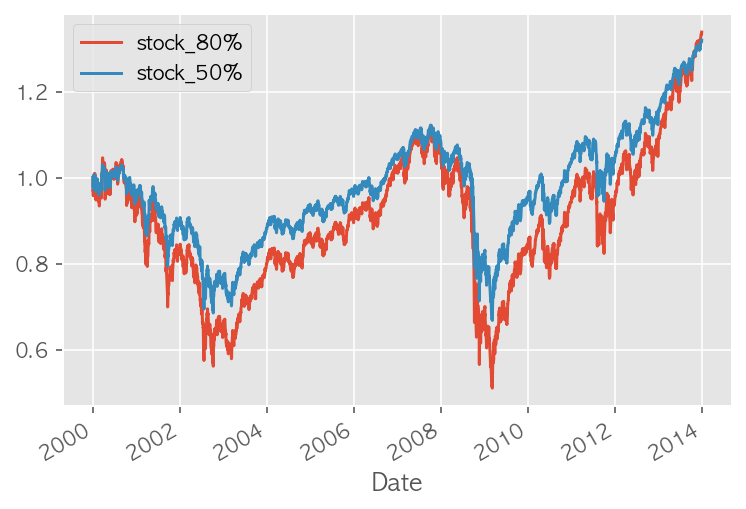

In [44]:
portfolio("SPY", 0.8, "2000","2014")
portfolio("SPY", 0.5, "2000","2014")

Portfolio return :  3.6215323551082212
Portfolio variance :  0.4068434377710483 

Portfolio return :  2.418713964423935
Portfolio variance :  0.11682486304115319 



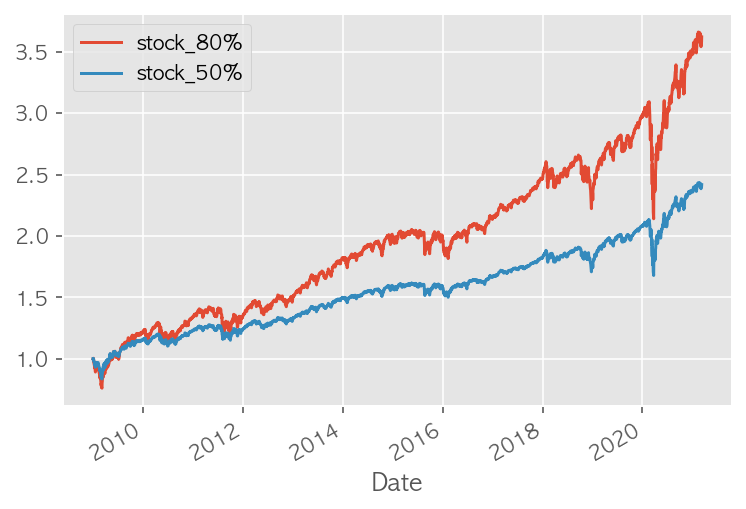

In [45]:
portfolio("SPY", 0.8, "2009","2022")
portfolio("SPY", 0.5, "2009","2022")

Portfolio return :  1.6010403882847593
Portfolio return :  1.4106571444051372


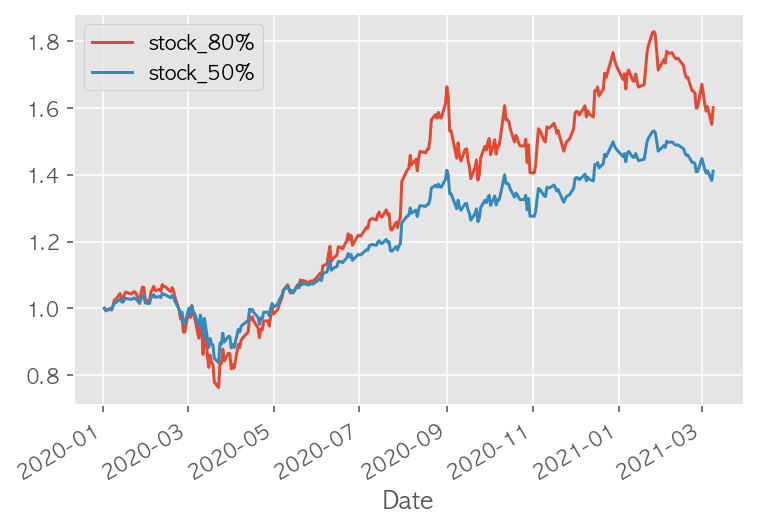

In [33]:
portfolio("AAPL", 0.8, "2020","2022")
portfolio("AAPL", 0.5, "2020","2022")